<a href="https://colab.research.google.com/github/Leakathr1n/Foundations_of_Data_Science_Cargo2000/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foundations of Data Science project notebook**

Team members:  

Predictive Question:

# **Packages needed to run this notebook**
We install and import all necessary libaries for this notebook in the following code cell

In [1]:
library(dplyr) # needed for basic transformation on the DS
library(readxl) # needed to open and read xlsx-files
library(tidyr) # neeeded for reshaping
library(ggplot2) # needed for plotting


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **Downloading and Cleaning the Data**

In [2]:
system("gdown 19zj1uN65nQVoGdFHQxtxrDVxflopCAuQ6AwR-LXQSuA")
raw_data <- read_excel("/content/c2k_data_comma.xlsx")

New names:
• `` -> `...99`


In [3]:
head(raw_data)

nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,⋯,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs,...99
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,5182,199,218,210,215,609,935,736,256,⋯,?,?,?,?,?,780,434,1,2,NA
1,6523,844,584,90,297,700,1935,1415,431,⋯,?,?,?,?,?,3870,445,1,2,NA
2,5878,4380,4119,90,280,456,905,547,700,⋯,?,?,?,?,?,550,1520,1,1,NA
3,1275,759,169,240,777,173,340,577,349,⋯,?,?,?,?,?,3780,159,1,1,NA
4,8117,1597,1485,150,241,411,585,612,128,⋯,?,?,?,?,?,4140,4797,2,1,NA
5,9889,181,98,240,259,815,215,223,128,⋯,?,?,?,?,?,3960,467,1,2,NA


## **Cleaning the data**

We are now cleaning our data and store it in clean_data

In [4]:
# removing the unnecessary last column
clean_data <- raw_data[, !names(raw_data) %in% "...99"]

In [27]:
# converting all columns into numerical, except for "factors" or categorical variables!
# this also ensures that all our "?" are converted in NA;)

clean_data <- clean_data %>%
  mutate(
    across(!matches("id|leg|hops", ignore.case = TRUE), as.numeric), # convert into numeric
    across(matches("id|leg|hops", ignore.case = TRUE), as.factor) # convert into factors -- ENSURE ? are converted here!
  )

In [6]:
head(clean_data)

nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,⋯,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
0,5182,199,218,210,215,609,935,736,256,⋯,NA,NA,NA,NA,NA,NA,780,434,1,2
1,6523,844,584,90,297,700,1935,1415,431,⋯,NA,NA,NA,NA,NA,NA,3870,445,1,2
2,5878,4380,4119,90,280,456,905,547,700,⋯,NA,NA,NA,NA,NA,NA,550,1520,1,1
3,1275,759,169,240,777,173,340,577,349,⋯,NA,NA,NA,NA,NA,NA,3780,159,1,1
4,8117,1597,1485,150,241,411,585,612,128,⋯,NA,NA,NA,NA,NA,NA,4140,4797,2,1
5,9889,181,98,240,259,815,215,223,128,⋯,NA,NA,NA,NA,NA,NA,3960,467,1,2


## **Analysing the NA's**

We have seen that our dataset has quite a lot of missing values. While they were initially encoded as "?", when we converted them into numerical values, the question mark was converted into a proper R "NA". We will now dive deeper into the missing values and explore if there is a pattern.

For convenience, we add an overview of the dataset here. This will also help us explaining the relationship between the missing values.

![Alt text](https://raw.githubusercontent.com/Leakathr1n/Foundations_of_Data_Science_Cargo2000/main/99%20Additional%20material/Overview%20of%20dataset.png)

In [7]:
# Let's start with a very broad overview
summary(clean_data)

# quite a lot of missing values; let's see if we can bring some structure to this;)

       nr            i1_legid       i1_rcs_p          i1_rcs_e    
 Min.   :   0.0   1      :   1   Min.   :    5.0   Min.   :    1  
 1st Qu.: 986.2   2      :   1   1st Qu.:  377.8   1st Qu.:  113  
 Median :1971.5   7      :   1   Median : 1085.0   Median :  340  
 Mean   :1971.3   9      :   1   Mean   : 2203.5   Mean   : 1653  
 3rd Qu.:2956.8   13     :   1   3rd Qu.: 1946.5   3rd Qu.: 1375  
 Max.   :3942.0   14     :   1   Max.   :47190.0   Max.   :46357  
                  (Other):3936                                    
   i1_dep_1_p       i1_dep_1_e     i1_dep_1_place    i1_rcf_1_p  
 Min.   :  75.0   Min.   :   4.0   Min.   :101.0   Min.   :  50  
 1st Qu.: 120.0   1st Qu.: 263.0   1st Qu.:308.0   1st Qu.: 455  
 Median : 180.0   Median : 516.0   Median :485.0   Median : 820  
 Mean   : 205.9   Mean   : 711.4   Mean   :503.7   Mean   : 796  
 3rd Qu.: 240.0   3rd Qu.: 949.8   3rd Qu.:700.0   3rd Qu.:1020  
 Max.   :2876.0   Max.   :9513.0   Max.   :815.0   Max.   :5001  
  

In [8]:
# creating subsets per each leg & outbound
subset_i1 <- clean_data[, c("nr", grep("^i1", names(clean_data), value = TRUE))]
subset_i2 <- clean_data[, c("nr", grep("^i2", names(clean_data), value = TRUE))]
subset_i3 <- clean_data[, c("nr", grep("^i3", names(clean_data), value = TRUE))]
subset_o <- clean_data[, c("nr", grep("^o", names(clean_data), value = TRUE))]

head(subset_i1)

nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,⋯,i1_rcf_2_place,i1_dep_3_p,i1_dep_3_e,i1_dep_3_place,i1_rcf_3_p,i1_rcf_3_e,i1_rcf_3_place,i1_dlv_p,i1_dlv_e,i1_hops
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,5182,199,218,210,215,609,935,736,256,⋯,NA,NA,NA,NA,NA,NA,NA,840,1539,1
1,6523,844,584,90,297,700,1935,1415,431,⋯,NA,NA,NA,NA,NA,NA,NA,3780,5790,1
2,5878,4380,4119,90,280,456,905,547,700,⋯,NA,NA,NA,NA,NA,NA,NA,3780,321,1
3,1275,759,169,240,777,173,340,577,349,⋯,671,NA,NA,NA,NA,NA,NA,335,535,2
4,8117,1597,1485,150,241,411,585,612,128,⋯,166,NA,NA,NA,NA,NA,NA,4230,1255,2
5,9889,181,98,240,259,815,215,223,128,⋯,NA,NA,NA,NA,NA,NA,NA,4890,115,1


# A tibble: 3 × 3
  i1_hops     n Percent
  <fct>   <int>   <dbl>
1 1        2747  69.7  
2 2        1172  29.7  
3 3          23   0.583


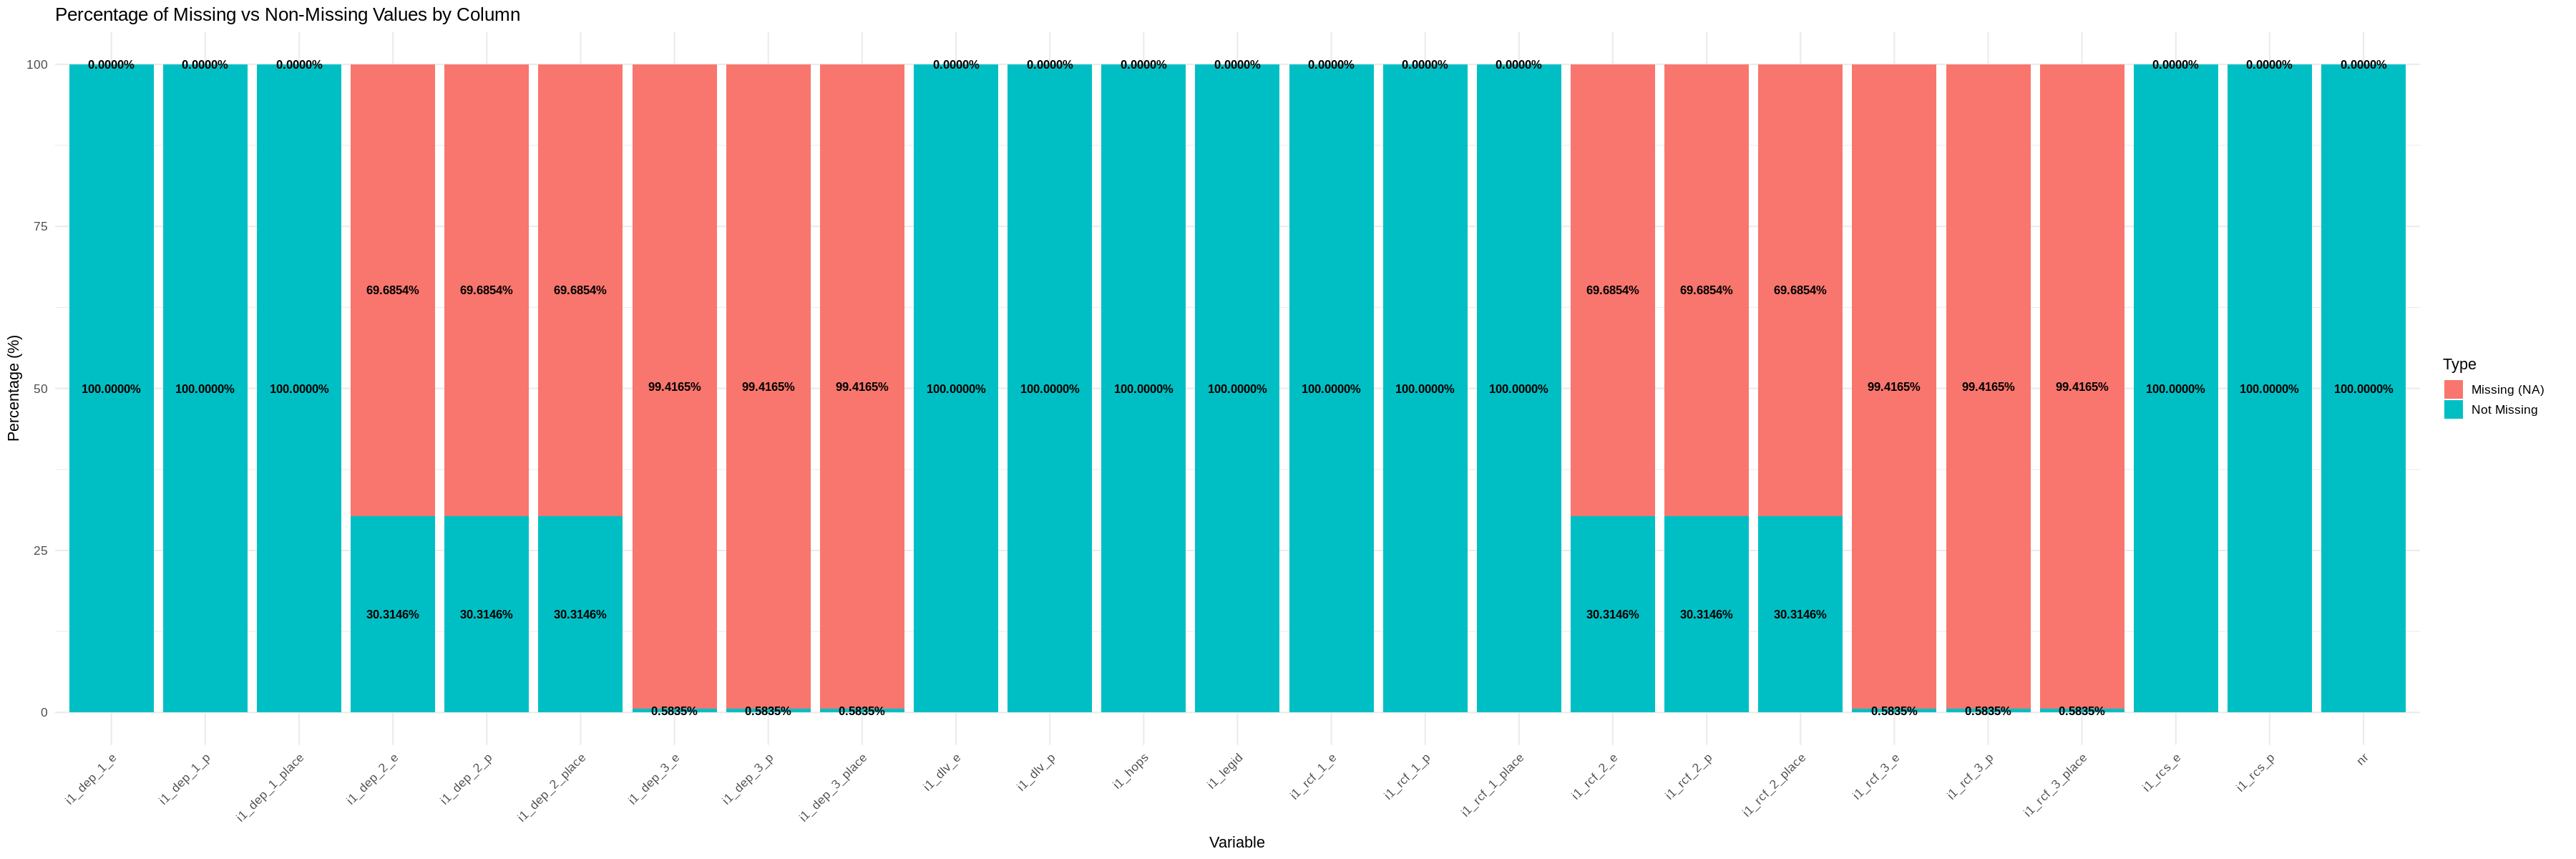

In [32]:
# it is a bit annoying with creating loops in google colab since you cannot easily export graphics form this notebook to the google drive :((

options(repr.plot.width=30,repr.plot.height=10) # adjusting the plot size so that is better to see in google colab


na_summary <- subset_i1 %>%
  summarise(across(everything(),
                   ~sum(is.na(.))/n() * 100,
                   .names = "NA_{.col}")) %>%
  pivot_longer(everything(),
               names_to = "Variable",
               values_to = "Percent_NA") %>%
  mutate(Variable = gsub("^NA_", "", Variable),
         Percent_Not_NA = 100 - Percent_NA) %>%
  pivot_longer(cols = c(Percent_NA, Percent_Not_NA),
               names_to = "Type",
               values_to = "Percent")

na_summary$Type <- recode(na_summary$Type,
                          Percent_NA = "Missing (NA)", #label cleaning for display
                          Percent_Not_NA = "Not Missing") # label cleaning for displa

# actually plotting yeyyy;)
ggplot(na_summary, aes(x = reorder(Variable, -Percent), y = Percent, fill = Type)) +
  geom_col(position = "stack") +
  geom_text(aes(label = sprintf("%.4f%%", Percent)), #specifying how many decimals
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.5, fontface = "bold") +
  labs(
    title = "Percentage of Missing vs Non-Missing Values by Column",
    x = "Variable",
    y = "Percentage (%)"
  ) +
  # scale_fill_manual(values = c("Missing (NA)" = "firebrick", "Not Missing" = "steelblue")) + #discuss colours we want!
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

 hops_summary <- subset_i1 %>%
    count(i1_hops) %>%
    mutate(Percent = n / sum(n) * 100)

    print(hops_summary)


**Exploration of the data -- Getting a first overview**

In [24]:
head(subset_i3)

nr,i3_legid,i3_rcs_p,i3_rcs_e,i3_dep_1_p,i3_dep_1_e,i3_dep_1_place,i3_rcf_1_p,i3_rcf_1_e,i3_rcf_1_place,⋯,i3_rcf_2_place,i3_dep_3_p,i3_dep_3_e,i3_dep_3_place,i3_rcf_3_p,i3_rcf_3_e,i3_rcf_3_place,i3_dlv_p,i3_dlv_e,i3_hops
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,?,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,?
1,?,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,?
2,?,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,?
3,?,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,?
4,?,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,?
5,?,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,?
